<a href="https://colab.research.google.com/github/raflidzaky/logit-modelling/blob/main/Housing_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

dataset_upload = files.upload()

Saving Housing.csv to Housing.csv


In [4]:
import pandas as pd
dataset = pd.read_csv('Housing.csv')
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Info

In [ ]:
# This code will show us how much columns and rows within the data set
dataset.shape
'''Result interpretation: (Rows, Columns)'''

(545, 13)

In [ ]:
# This code will show us a full information about each columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Dealing with Outliers

In [5]:
# Identify Outliers with Interquartile technique

## Define the interquartile: distance between 1st quartile and 3rd quartile
iqr = dataset['price'].quantile(.75) - dataset['price'].quantile(.25)

## Set the upper bound of interquartile
iqr_positive = dataset['price'].quantile(.75) + (1.5 * iqr)

## Set the lower bound of interquartile
iqr_negative = dataset['price'].quantile(.25) - (1.5 * iqr)

'''Logic of interquartile techniques: Outlier is a point of data further from lower/upper bound of interquartile'''

'''To do so, I need a null variable to hold the outlier values'''
rows_in_dataset = []

'''This loop logic is define which row in 'price' column that is an outlier, given the interquartile logic'''
for indexes, rows in dataset.iterrows():

  '''If the row on n-th index is an outlier, the program will take hold that value to the null variable'''

  if rows['price'] > iqr_positive or rows['price'] < iqr_negative:
    rows_in_dataset.append(indexes)

'''Finally, the new dataset is the dataset without values in the null variable (outliers)'''
dataset_new = dataset.drop(rows_in_dataset)

In [ ]:
dataset_new.shape

(530, 13)

In [6]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             530 non-null    int64 
 1   area              530 non-null    int64 
 2   bedrooms          530 non-null    int64 
 3   bathrooms         530 non-null    int64 
 4   stories           530 non-null    int64 
 5   mainroad          530 non-null    object
 6   guestroom         530 non-null    object
 7   basement          530 non-null    object
 8   hotwaterheating   530 non-null    object
 9   airconditioning   530 non-null    object
 10  parking           530 non-null    int64 
 11  prefarea          530 non-null    object
 12  furnishingstatus  530 non-null    object
dtypes: int64(6), object(7)
memory usage: 54.0+ KB


In [ ]:
# To process the data on Eviews Software, I convert the new dataset to .xlsx format and download it without any index
dataset_new.to_excel('new dataset.xlsx', index = False)

# Data Description

## Prices

In [13]:
''' In the data description section, I explore the basic descriptive statistics within the attribute'''
quantile_1 = dataset_new['price'].quantile(.25)
median = dataset_new['price'].quantile(.50)
quantile_3 = dataset_new['price'].quantile(.75)
mean = dataset_new['price'].mean()
standard_deviation = dataset_new['price'].std()
min = dataset_new['price'].min()
max = dataset_new['price'].max()

print(f'''
quantile 1: {quantile_1},
quantile 2: {median},
quantile 3: {quantile_3},
mean: {mean.round(2)},
standard deviation: {standard_deviation.round(2)},
min: {min},
max: {max}''')


quantile 1: 3430000.0,
quantile 2: 4270000.0,
quantile 3: 5600000.0,
mean: 4600663.09,
standard deviation: 1596119.21,
min: 1750000,
max: 9100000


In [11]:
import math
import numpy as np
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality distribution test
print(shapiro(dataset_new['price']))

'''The Shapiro-Wilk test result shows that 'price' atribute does not normally distribution'''

ShapiroResult(statistic=0.9575926661491394, pvalue=3.237094620134329e-11)


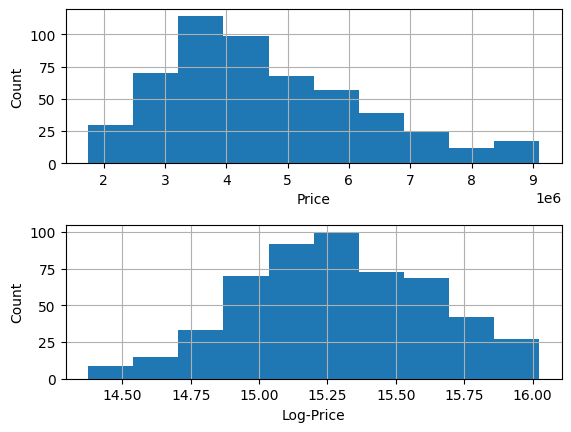

In [12]:
import matplotlib.pyplot as plt

'''To compare the distribution of price and log price, I do a double sub-graphics in one set of visualization/plot'''
'''The formats of the sub-graphics are two row and one column'''
'''Format above is easing the reader to compare which graphics has the more skewed distribution'''

# First sub-graphics: Distribution of Price
plt.subplot(2, 1, 1)
plot_1 = dataset_new['price'].hist()
plt.ylabel('Count')
plt.xlabel('Price')

# First sub-graphics: Distribution of Log-Price
plt.subplot(2, 1, 2)
transformed_price = np.log(dataset_new['price'])
plot_2 = transformed_price.hist()
plt.ylabel('Count')
plt.xlabel('Log-Price')

# Define the space between first sub-graphics and second sub-graphics
plt.subplots_adjust(hspace = 0.4)

In [ ]:
# Descriptive statistics of log-price
quantile_1 = transformed_price.quantile(.25)
median = transformed_price.quantile(.50)
quantile_3 = transformed_price.quantile(.75)
mean = transformed_price.mean()
standard_deviation = transformed_price.std()
min = transformed_price.min()
max = transformed_price.max()

print(f'''
quantile 1: {quantile_1.round(2)},
quantile 2: {median.round(2)},
quantile 3: {quantile_3.round(2)},
mean: {mean.round(2)},
standard deviation: {standard_deviation.round(2)},
min: {min.round(2)},
max: {max.round(2)}''')


quantile 1: 15.05,
quantile 2: 15.27,
quantile 3: 15.54,
mean: 15.28,
standard deviation: 0.35,
min: 14.38,
max: 16.02


In [ ]:
# Shapiro-Wilk normality test of log-price
print(shapiro(transformed_price))

'''Result below shows that log-price remains not normally distributed'''

ShapiroResult(statistic=0.9926916360855103, pvalue=0.010877659544348717)

## Area

In [ ]:
# Descriptive statistics of 'Area' attribute
quantile_1 = dataset_new['area'].quantile(.25)
median = dataset_new['area'].quantile(.50)
quantile_3 = dataset_new['area'].quantile(.75)
mean = dataset_new['area'].mean()
standard_deviation = dataset_new['area'].std()
min = dataset_new['area'].min()
max = dataset_new['area'].max()

print(f'''
quantile 1: {quantile_1},
quantile 2: {median},
quantile 3: {quantile_3},
mean: {mean.round(2)},
standard deviation: {standard_deviation.round(2)},
min: {min},
max: {max}''')


quantile 1: 3547.5,
quantile 2: 4500.0,
quantile 3: 6315.75,
mean: 5061.52,
standard deviation: 2075.45,
min: 1650,
max: 15600


Text(0.5, 1.0, 'Distribution of Housing Area')

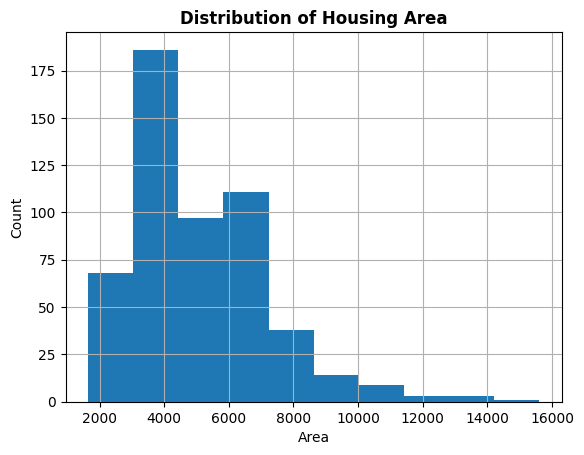

In [ ]:
dataset_new['area'].hist()
plt.ylabel('Count')
plt.xlabel('Area')
plt.title('Distribution of Housing Area', fontweight = 'bold')

In [ ]:
# Shapiro-Wilk normality test of Housing Area
print(shapiro(dataset_new['area']))

ShapiroResult(statistic=0.9193186163902283, pvalue=3.17203436123352e-16)

In [ ]:
# Shapiro-Wilk normality test of log-Housing Area
transformed_area = np.log(dataset_new['area'])
shapiro(transformed_area)

ShapiroResult(statistic=0.9932228326797485, pvalue=0.01731082797050476)

## Mainroad

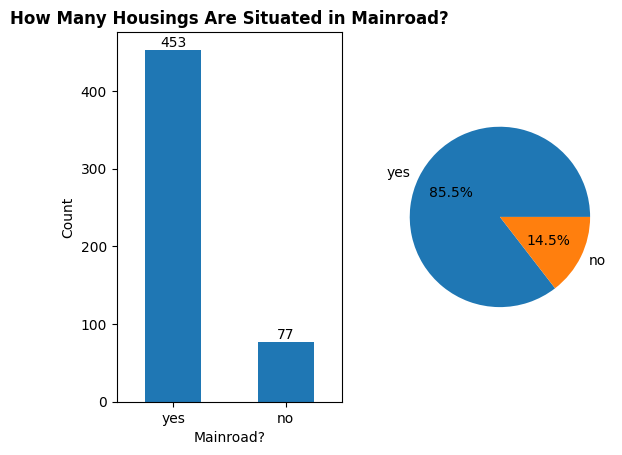

In [16]:
import matplotlib.pyplot as plt

'''The purpose of this code block is giving us a glimpse of the distribution of mainroad'''
'''The formats of the sub-graphics are one row and two column'''

# Initialization: Prepare data to be contained in the graphics
mainroad = dataset_new['mainroad'].value_counts()

# This code line will give us a decimal value of mainroad's proportion
'''dataset_new['mainroad'].count() perform as a denominator (total sample in mainroad column)'''
percentage_mainroad = (mainroad/dataset_new['mainroad'].count()).mul(100)

# This code line will give us a label on the bar chart ('yes' or 'no' label)
labels = dataset_new['mainroad'].unique()

# First sub-graphics: Bar chart of mainroad
plt.subplot(1, 2, 1)
plot = mainroad.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Mainroad?')
plot.set_xticklabels(mainroad.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

# Title of the graphics
plot.set_title('How Many Housings Are Situated in Mainroad?', fontweight = 'bold')

# Second sub-graphics: Pie chart of mainroad
plt.subplot(1, 2, 2)

'''We need to convert the decimal value on percentage_mainroad to percentage value'''
fig = plt.pie(percentage_mainroad, labels = labels, autopct = '%1.1f%%')

## Guest Room

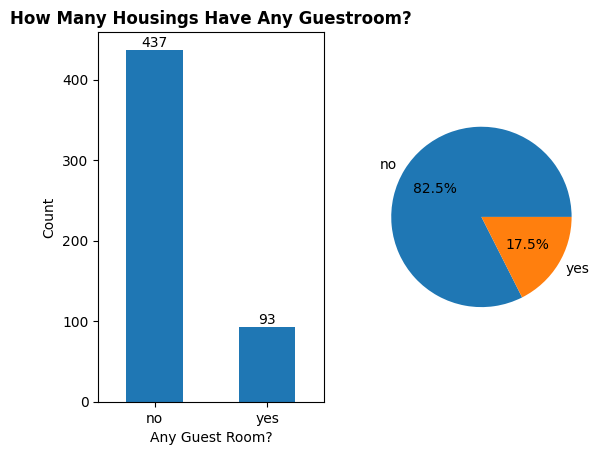

In [15]:
'''The purpose of this code block is giving us a glimpse of the distribution of guest room'''
'''The formats of the sub-graphics are one row and two column'''

guestrooms = dataset_new['guestroom'].value_counts()
percentage_guestrooms = (guestrooms/dataset_new['guestroom'].count()).mul(100)
labels = dataset_new['guestroom'].unique()

# First sub-graphics: Bar chart of Guest Room
plt.subplot(1, 2, 1)
plot = guestrooms.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Any Guest Room?')
plot.set_xticklabels(guestrooms.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

plot.set_title('How Many Housings Have Any Guestroom?', fontweight = 'bold')

# Second sub-graphics: Pie chart of Guest Room
plt.subplot(1, 2, 2)
fig = plt.pie(percentage_guestrooms, labels = labels, autopct = '%1.1f%%')

## Basements

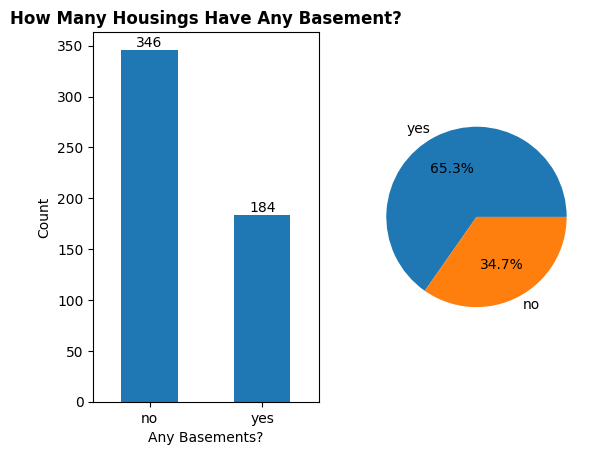

In [ ]:
'''The purpose of this code block is giving us a glimpse of the distribution of basement'''
'''The formats of the sub-graphics are one row and two column'''

basements = dataset_new['basement'].value_counts()
percentage_basements = (basements/dataset_new['basement'].count()).mul(100)
labels = dataset_new['basement'].unique()

# First sub-graphics: Bar chart of Basement
plt.subplot(1, 2, 1)
plot = basements.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Any Basements?')
plot.set_xticklabels(guestrooms.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

plot.set_title('How Many Housings Have Any Basement?', fontweight = 'bold')

# Second sub-graphics: Pie chart of Basement
plt.subplot(1, 2, 2)
fig = plt.pie(percentage_basements, labels = labels, autopct = '%1.1f%%')

## Hot Water Heating

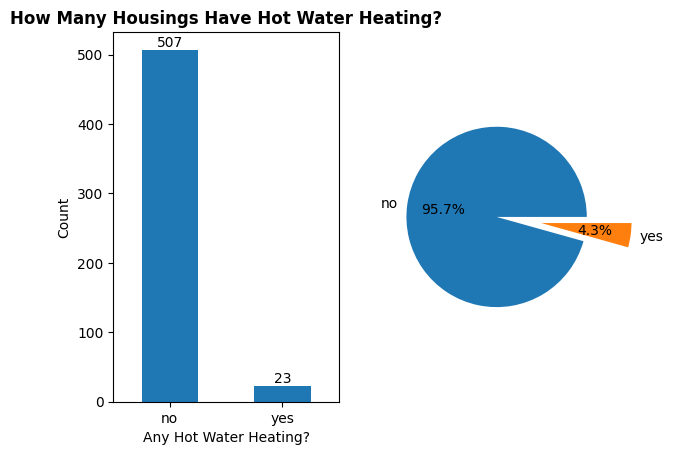

In [ ]:
'''The purpose of this code block is giving us a glimpse of the distribution of hot water heating'''
'''The formats of the sub-graphics are one row and two column'''

water_heatings = dataset_new['hotwaterheating'].value_counts()
percentage_heatings = (water_heatings/dataset_new['hotwaterheating'].count()).mul(100)
labels = dataset_new['hotwaterheating'].unique()

'''Because of small proportion in 'yes', it will be difficult to see the label'''
'''Hence, I need to give a space between 'yes' and 'no' proportions'''
'''Second component on "percentage_heatings" series will be given a space'''
explodes = [0, 0.5]

# First sub-graphics: Bar chart of Hot Water Heating
plt.subplot(1, 2, 1)
plot = water_heatings.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Any Hot Water Heating?')
plot.set_xticklabels(water_heatings.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

plot.set_title('How Many Housings Have Hot Water Heating?', fontweight = 'bold')

# Second sub-graphics: Pie chart of Hot Water Heating
plt.subplot(1, 2, 2)
fig = plt.pie(percentage_heatings, labels = labels, autopct = '%1.1f%%', explode = explodes)

## Air Conditionings

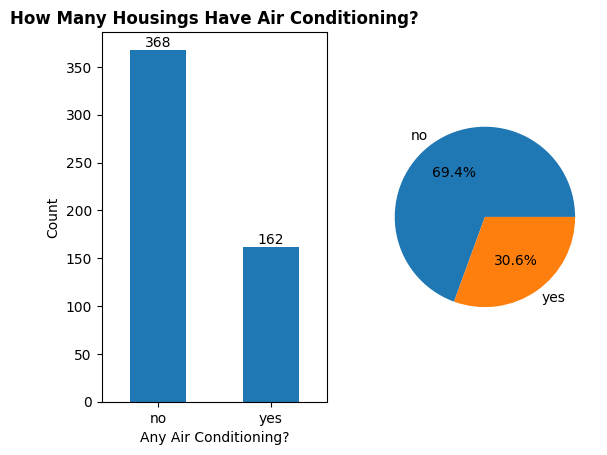

In [ ]:
'''The purpose of this code block is giving us a glimpse of the distribution of air conditioning'''
'''The formats of the sub-graphics are one row and two column'''

air_conditionings = dataset_new['airconditioning'].value_counts()
percentage_ac =  (air_conditionings/dataset_new['airconditioning'].count()).mul(100)

'''Since unique() will group the categorical data from its first row, the label in the pie chart
   will be irrelevant'''
'''For example, the orange proportion represent the 'yes' value. If we use .unique(), the label
   however show us a 'no' value.'''
'''To solve such problem, I group the value with this code line'''
label_1 = air_conditionings.index

# First sub-graphics: Bar chart of Air Conditioning
plt.subplot(1, 2, 1)
plot = air_conditionings.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Any Air Conditioning?')
plot.set_xticklabels(air_conditionings.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

plot.set_title('How Many Housings Have Air Conditioning?', fontweight = 'bold')

# Second sub-graphics: Bar chart of Air Conditioning
plt.subplot(1, 2, 2)
fig = plt.pie(percentage_ac, labels = label_1, autopct = '%1.1f%%')

## Preferred Area

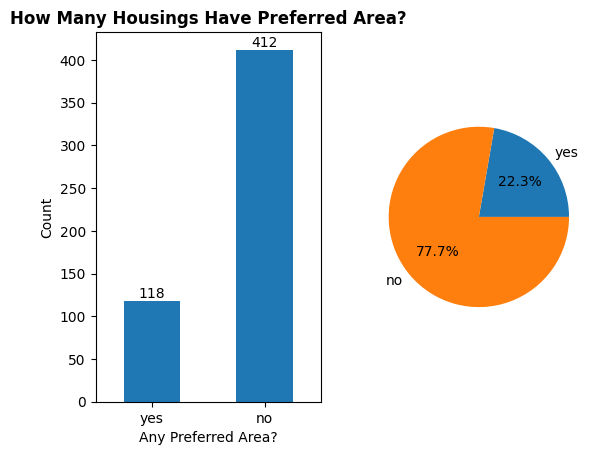

In [ ]:
'''The purpose of this code block is giving us a glimpse of the distribution of preferred area'''
'''The formats of the sub-graphics are one row and two column'''

pref_area = dataset_new['prefarea'].value_counts().sort_values(ascending = True)
percentage_prefarea = (pref_area/dataset_new['prefarea'].count()).mul(100)
label_2 = pref_area.index

# First sub-graphics: Bar chart of Preferred Area
plt.subplot(1, 2, 1)
plot = pref_area.plot.bar()
plot.set_ylabel('Count')
plot.set_xlabel('Any Preferred Area?')
plot.set_xticklabels(pref_area.index, rotation = 0)
plot.bar_label(plot.containers[0], label_type = 'edge')

plot.set_title('How Many Housings Have Preferred Area?', fontweight = 'bold')

# Second sub-graphics: Pie chart of Preferred Area
plt.subplot(1, 2, 2)
fig = plt.pie(pref_area, labels = label_2, autopct = '%1.1f%%')